This example was introduced in [BTV03] showing that there exists values of $\alpha$ for which the finiteness conjecture does not hold, that is, there is no $w = \sigma_1, \ldots, \sigma_k$ such that
$\sqrt[k]{\rho(A_{\sigma_k} \cdots A_{\sigma_1})}$ is equal to the JSR (such product is called a Spectral Maximizing Product (s.m.p.)).
Let $J_w \subseteq [0, 1]$ be the set of $\alpha$ such that $w$ is a s.m.p.
They show that for two words $u, v$ we have either $J_u = J_v$ (in which case $uuu\cdots$ and $vvv\cdots$ are identical up to a different prefix) or $J_u \cap J_v = \emptyset$.
In fact, let $\beta = \log(\alpha)$, since the function $h_w(\beta) = \log(\sqrt[|w|]{\rho(A_w)}) = \frac{1}{|w|}(\log(\rho(A_w)) + |w|_1 \beta)$ is affine in $\beta$, $J_u$ and $J_v$ can only be either equal, with empty intersection or with intersection equal to one of their two boundary points.
So [BTV03] excludes this last case.
The authors also mention that
$$ J_{0} = \{0\} \quad \text{ and } \quad J_1 = \emptyset. $$

In [Section V, GZ05], the authors show that
$$J_{10} = [4/5, 1] \quad \text{ and } \quad J_{100} \approx [0.5734, 0.7444]$$
The s.m.p. $10$ is not dominant for $\alpha = 4/5$ (see [Example 1, GP13]) but is dominant for $\alpha = 9/10$ (see [Example 2, GP13]).

It was then shown in [Section 6, GZ08] that for
$$J_{10010} =
\left[\frac{222924 - 23339 \sqrt{6}}{221184}, \frac{36864(222924 - 23339 \sqrt{6})}{7737809375} \right]
\approx [0.74940031328298342722, 0.789681582229248583974]$$

It was then proved in [HMST11] that the finiteness property does not hold for
$$\alpha = 0.749326546330367557943961948091344672091327370236064317358024...$$

[BTV03] V. D. Blondel, J. Theys and A. A. Vladimirov,
*An elementary counterexample to the finiteness conjecture*,
SIAM Journal on Matrix Analysis and Applications, **2003**. 24, 963-970.

[GP13] N. Guglielmi and V. Protasov.
*Exact computation of joint spectral characteristics of linear operators*.
Foundations of Computational Mathematics 13.1, **2013**, 37-97.

[GZ05] N. Guglielmi and M. Zennaro.
*Polytope norms and related algorithms for the computation of the joint spectral radius*.
44th IEEE Conference on Decision and Control, and European Control Conference, **2005**, pp. 3007-3012.

[GZ08] N. Guglielmi and M. Zennaro.
*An algorithm for finding extremal polytope norms of matrix families*.
Linear Algebra and its Applications, **2008**, 428(10), 2265-2282.

[HMST11] K. G. Hare, I. D Morris, N. Sidorov and J. Theys,
*An explicit counterexample to the Lagarias–Wang finiteness conjecture*.
Advances in Mathematics, **2011**, 226(6), 4667-4701.

# Defining the system

We start by defining the system using [HybridSystems](https://github.com/blegat/HybridSystems.jl) to represent the system and [StaticArrays](https://github.com/JuliaArrays/StaticArrays.jl) for an allocation-free representation of the matrices.

In [1]:
using HybridSystems
using StaticArrays
A0 = @SMatrix [1 1; 0 1]
A1 = @SMatrix [1 0; 1 1]
A(α) = discreteswitchedsystem([A0, α * A1])
s1 = A(1.0)

Hybrid System with automaton OneStateAutomaton(2)

We define a convenient printing function for printing the s.m.p. candidate we find. 

In [2]:
using SwitchOnSafety
strbin(s, bin::String) = periodicswitching(s, [HybridSystems.OneStateTransition(b - '0' + 1) for b in bin])
binstr(smp::SwitchOnSafety.DiscretePeriodicSwitching) = join(map(tr -> tr.σ - 1, smp.period))
function show_smp(smp)
    println("   SMP: ", binstr(smp))
    println("Length: ", length(smp.period))
    println("Growth: ", smp.growthrate)
end

┌ Info: Recompiling stale cache file /home/blegat/.julia/compiled/v1.1/SwitchOnSafety/EUPLd.ji for SwitchOnSafety [ceb7f16a-07bf-5f4a-9354-b68f01b1610f]
└ @ Base loading.jl:1184


show_smp (generic function with 1 method)

## $\alpha = 8/10$

For $\alpha = 8/10$, 10 is not a dominant s.m.p. but as the algorithm removes path lying on the boundary of the polytope, it still converges (see [Example 1, GP13]).

In [4]:
using GLPK
using SwitchOnSafety
s = A(0.8)
smp, done, polys = invariant_polytopes(s, with_optimizer(GLPK.Optimizer),
    SwitchOnSafety.periodicswitching(s, [2, 1]), tol=0.0, verbose=2);

v_1 = [0.850651, 0.525731]
v_2 = [0.470228, 0.760845]
Depth 1: [2] points, 2 living leaves...
Path starting starting at root 1: Int64[]:
1 : [0.951057, 0.363271] : living leaf: -0.10557280900008414 < 0.0

Path starting starting at root 2: Int64[]:
2 : [0.259936, 0.680521] : dead leaf: 0.11803398874989468 ≥ 0.0

Depth 2: [3] points, 1 living leaves...
Path starting starting at root 1: [1]:
1 : [0.908178, 0.251014] : dead leaf: 0.04721359549995796 ≥ 0.0

2 : [0.525731, 0.726543] : dead leaf: 0.0 ≥ 0.0

0 living leaves, PSW(1.447214, [2, 1]) is a spectral maximizing product (s.m.p.)
Use `tol` < -0.10557280900008414 to eliminite at least one more living leaf.
Use `tol` > 0.0 to keep at least one more dead leaf.


In [10]:
using GLPK
using SwitchOnSafety
s = A(0.8)
smp, done, polys = invariant_polytopes(s, with_optimizer(GLPK.Optimizer),
    SwitchOnSafety.periodicswitching(s, [2, 1]), tol=1e-15, verbose=2);

v_1 = [0.850651, 0.525731]
v_2 = [0.470228, 0.760845]
Depth 1: [2] points, 2 living leaves...
Path starting starting at root 1: Int64[]:
1 : [0.951057, 0.363271] : living leaf: -0.10557280900008414 < 1.0e-15

Path starting starting at root 2: Int64[]:
2 : [0.259936, 0.680521] : dead leaf: 0.11803398874989468 ≥ 1.0e-15

Depth 2: [3] points, 1 living leaves...
Path starting starting at root 1: [1]:
1 : [0.908178, 0.251014] : dead leaf: 0.04721359549995796 ≥ 1.0e-15

2 : [0.525731, 0.726543] : living leaf: 0.0 < 1.0e-15

Depth 3: [4] points, 1 living leaves...
Path starting starting at root 1: [2, 1]:
1 : [0.8653, 0.502029] : living leaf: 0.0 < 1.0e-15

2 : [0.290617, 0.69224] : dead leaf: 0.09910635852267946 ≥ 1.0e-15

Depth 4: [5] points, 1 living leaves...
Path starting starting at root 1: [1, 2, 1]:
1 : [0.944801, 0.346893] : dead leaf: 0.006621362806405129 ≥ 1.0e-15

2 : [0.478326, 0.755841] : living leaf: 2.220446049250313e-16 < 1.0e-15

Depth 5: [6] points, 1 living leaves...
Path 

In [11]:
using GLPK
using SwitchOnSafety
s = A(0.8)
smp, done, polys = invariant_polytopes(s, with_optimizer(GLPK.Optimizer),
    SwitchOnSafety.periodicswitching(s, [2, 1]), tol=1e-16, verbose=2);

v_1 = [0.850651, 0.525731]
v_2 = [0.470228, 0.760845]
Depth 1: [2] points, 2 living leaves...
Path starting starting at root 1: Int64[]:
1 : [0.951057, 0.363271] : living leaf: -0.10557280900008414 < 1.0e-16

Path starting starting at root 2: Int64[]:
2 : [0.259936, 0.680521] : dead leaf: 0.11803398874989468 ≥ 1.0e-16

Depth 2: [3] points, 1 living leaves...
Path starting starting at root 1: [1]:
1 : [0.908178, 0.251014] : dead leaf: 0.04721359549995796 ≥ 1.0e-16

2 : [0.525731, 0.726543] : living leaf: 0.0 < 1.0e-16

Depth 3: [4] points, 1 living leaves...
Path starting starting at root 1: [2, 1]:
1 : [0.8653, 0.502029] : living leaf: 0.0 < 1.0e-16

2 : [0.290617, 0.69224] : dead leaf: 0.09910635852267946 ≥ 1.0e-16

Depth 4: [5] points, 1 living leaves...
Path starting starting at root 1: [1, 2, 1]:
1 : [0.944801, 0.346893] : dead leaf: 0.006621362806405129 ≥ 1.0e-16

2 : [0.478326, 0.755841] : dead leaf: 2.220446049250313e-16 ≥ 1.0e-16

0 living leaves, PSW(1.447214, [2, 1]) is a spe

In [12]:
using GLPK
using SwitchOnSafety
s = A(0.8)
smp, done, polys = invariant_polytopes(s, with_optimizer(GLPK.Optimizer), SwitchOnSafety.periodicswitching(s, [2, 1]));

Depth 1: [2] points, 2 living leaves...
Depth 2: [3] points, 1 living leaves...
0 living leaves, PSW(1.447214, [2, 1]) is a spectral maximizing product (s.m.p.)
Use the `tol` keyword argument to change the threshold to evaluate dead and living leaves.


## $\alpha = 9/10$

For $\alpha = 9/10$, 10 is a dominant s.m.p. (see [Example 2, GP13]).

In [13]:
using GLPK
using SwitchOnSafety
s = A(0.9)
smp, done, polys = invariant_polytopes(s, with_optimizer(GLPK.Optimizer),
    SwitchOnSafety.periodicswitching(s, [2, 1]));

Depth 1: [2] points, 2 living leaves...
Depth 2: [3] points, 1 living leaves...
0 living leaves, PSW(1.535002, [2, 1]) is a spectral maximizing product (s.m.p.)
Use the `tol` keyword argument to change the threshold to evaluate dead and living leaves.


We can reproduce [Figure 2, GP13] below.

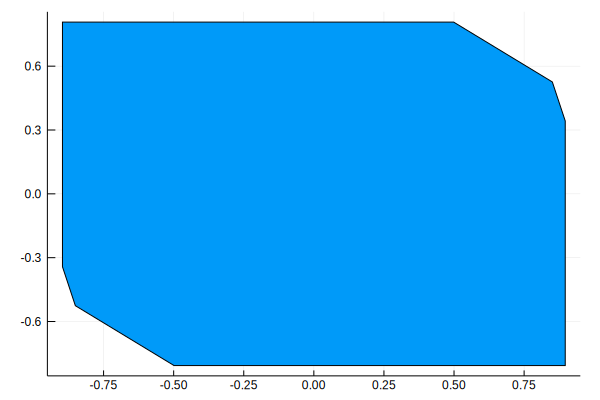

In [4]:
using Polyhedra
p = polyhedron(polys[1])
using Plots
plot(p)

# Truncated $h$ functions

In [BTV03], the authors introduce the function $h(\beta) = \sup_{w} h_w(\beta)$ which is a convex continuous function.
We consider here truncated version of the $h$ function: $h^K(\beta) = \sup_{|w| \le K} h_w(\beta)$,
the functions $h^K$ are polyhedral function and the $J_w^K$ sets in $h^K$ are supersets of the real $J_w$ sets.
Moreover, they are all strict supersets on both extremities (except for $J_0$ at $\alpha=0$ or $\beta = -\infty$) as they cannot intersect.
So we know that there will always be a $K' > K$ such that each vertex of $h_K$ is cut at $h_{K'}$.

In [3]:
using SwitchOnSafety
# Represents a function h_w(β)
struct H{S}
    smp::SwitchOnSafety.DiscretePeriodicSwitching{S, HybridSystems.OneStateTransition}
    constant::Float64 # log(ρ(A_w))
    coefficient::Int  # |w|_1
    k::Int            # |w|
end
function H(w::Int, k)
    smp = periodicswitching(s1, [HybridSystems.OneStateTransition(((w >> i) & 1) + 1) for i in 0:(k-1)])
    constant = log(smp.growthrate) * k
    coefficient = count(tr -> tr.σ == 2, smp.period)
    H{typeof(s1)}(smp, constant, coefficient, k)
end
binstr(h::H) = binstr(h.smp)
heval(h::H, β::Float64) = (h.constant + h.coefficient * β) / h.k
# Computes the intersection point β of two functions h_{w_1} and h_{w_2},
# that is, the β such that h_{w_1}(β) = h_{w_2}(β)
function intersect(h1::H, h2::H)
    if h1.coefficient/h1.k == h2.coefficient/h2.k
        return -Inf
    else
        -(h1.constant/h1.k - h2.constant/h2.k) / (h1.coefficient/h1.k - h2.coefficient/h2.k)
    end
end
# Returns a vector of all h_w function for |w| ≤ K
function hs(K)
    h = Vector{H{typeof(s1)}}(undef, (1 << (K+1)) - 2)
    j = 0
    for k in 1:K
        for w in 0:((1 << k) - 1)
            j += 1
            h[j] = H(w, k)
        end
    end
    return h
end
# Returns the intersection points β and the indices of active w for h^K
function hs_β_smp(K)
    hs = Main.hs(K)
    smp0 = 1
    for i in 2:length(hs)
        if heval(hs[i], 0.0) ≈ heval(hs[smp0], 0.0)
            if hs[i].coefficient / hs[i].k < hs[smp0].coefficient / hs[i].k
                smp0 = i
            end
        else
            if heval(hs[i], 0.0) > heval(hs[smp0], 0.0)
                smp0 = i
            end
        end
    end
    smp = [smp0]
    β = [0.0]
    while smp[end] != 1
        smpnext = 1
        function obj(h::H)
            i = intersect(h, hs[smp[end]])
            if i > β[end] || i ≈ β[end]
                return -Inf
            end
            return i
        end
        for i in 2:length(hs)
            o = obj(hs[i])
            if o ≈ obj(hs[smpnext])
                if hs[i].coefficient / hs[i].k < hs[smp0].coefficient / hs[i].k
                    smpnext = i
                end
            else
                if o < obj(hs[smpnext])
                    smpnext = i
                end
            end
        end
        j = argmax(obj.(hs))
        push!(β, obj(hs[j]))
        @assert β[end] < β[end-1]
        push!(smp, j)
    end
    return hs, β, smp
end
# Represents a set J_w^k
struct J{S}
    h::H{S}
    αmin::Float64
    αmax::Float64
end
function js(K)
    hs, β, smp = hs_β_smp(K)
    @assert length(β) == length(smp)
    return map(i -> begin
        αmax = exp(β[i])
        if i == length(β)
            αmin = 0.0
        else
            αmin = exp(β[i+1])
        end
        return J(hs[smp[i]], αmin, αmax)
    end, length(β):-1:1)
end
function Base.show(io::IO, j::J)
    println(io, " smp: ", binstr(j.h))
    println(io, "From: ", j.αmin)
    println(io, "  To: ", j.αmax)
end

In [4]:
using Plots
pyplot()
# plots h^K(β)
function plot_hβ(K)
    hs, β, smp = hs_β_smp(K)
    @show β
    plot()
    for i in 1:length(β)
        βnext = i == length(β) ? β[i] - 1 : β[i + 1]
        h = hs[smp[i]]
        plot!([β[i], βnext], [heval(h, β[i]), heval(h, βnext)], label=binstr(h))
    end
    plot!()
end
# plots h^K(α)
function plot_hα(K)
    hs, β, smp = hs_β_smp(K)
    @show exp.(β)
    plot(xlim = (0.0, 1.0))
    for i in 1:length(β)
        βnext = i == length(β) ? β[i] - 1 : β[i + 1]
        h = hs[smp[i]]
        plot!([exp(β[i]), exp(βnext)], [heval(h, β[i]), heval(h, βnext)], label=binstr(h))
    end
    plot!()
end

plot_hα (generic function with 1 method)

We can see that the intervals are indeed supersets of the intervals given in [GZ05] and [GZ08].

In [8]:
js(5)

6-element Array{J{HybridSystem{OneStateAutomaton,MathematicalSystems.DiscreteIdentitySystem,MathematicalSystems.LinearDiscreteSystem{Float64,SArray{Tuple{2,2},Float64,2,4}},AutonomousSwitching}},1}:
  smp: 0
From: 0.0
  To: 0.1715728752538099
                    
  smp: 10000
From: 0.1715728752538099
  To: 0.45702943146534875

  smp: 1000
From: 0.45702943146534875
  To: 0.5669785102410742
 
  smp: 100
From: 0.5669785102410742
  To: 0.7463911219155626
   
  smp: 10100
From: 0.7463911219155626
  To: 0.7967176639288206
 
  smp: 10
From: 0.7967176639288206
  To: 1.0
                   

We can plot the function $h^K(\beta)$ which is indeed convex and the function $h^K(\alpha)$ which isn't.

β = [0.0, -0.227255, -0.292506, -0.567434, -0.783007, -1.76275]


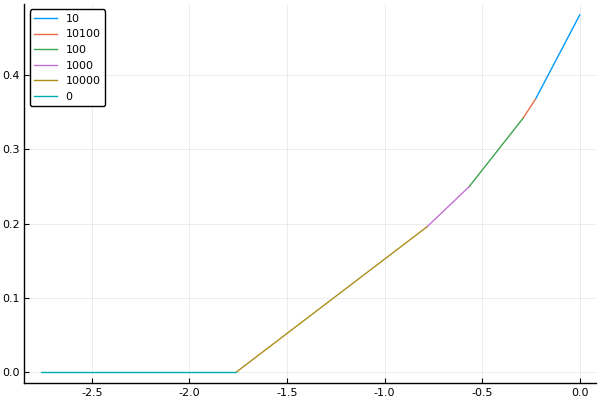

In [5]:
plot_hβ(5)

exp.(β) = [1.0, 0.796718, 0.746391, 0.566979, 0.457029, 0.171573]


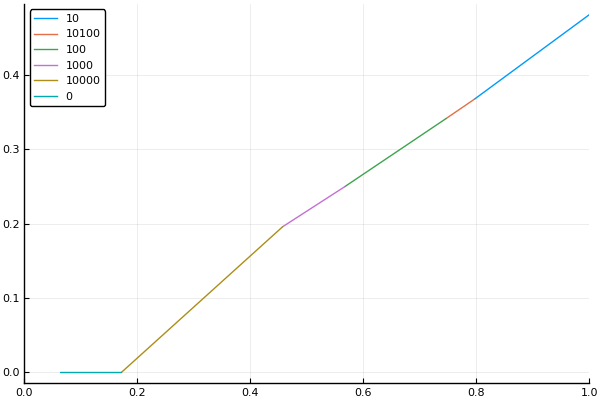

In [7]:
plot_hα(5)

# Getting close to non-finiteness

It was shown in [HMST11] that the finiteness conjecture does not hold for $\alpha = 0.749326546330367557943961948091344672091327370236064317358024$.
In a double-precision floating point number, the closest value we can represent is $\alpha = 0.7493265463303675$.
We create the switched system corresponding for this value of $\alpha$ and look for approximating the JSR for this value.

In [3]:
α∞ = 0.749326546330367557943961948091344672091327370236064317358024
@show significand(α∞)
@show exponent(α∞)
@show significand(α∞) / (1 << -exponent(α∞))
s∞ = A(α∞)

significand(α∞) = 1.498653092660735
exponent(α∞) = -1
significand(α∞) / (1 << -(exponent(α∞))) = 0.7493265463303675


Hybrid System with automaton OneStateAutomaton(2)

## Sum-of-Squares approach

We start with the Sum-of-Squares approach to have an idea of the value of the JSR.
We first choose an SDP solver.

In [9]:
using MathOptInterfaceMosek
using JuMP
factory = with_optimizer(MosekOptimizer, QUIET=true);

In [11]:
using SwitchOnSafety
lb = zeros(15)
ub = zeros(15)
function sos(d, tol; kws...)
    # Prevents the binary search to use a lower bound found by a cycle
    # to have to full timing of the binary search
    sosdata(s∞).lb = 0.0
    # Force recomputing it to have correct timing even when the function called twice with the same d
    if length(sosdata(s∞).lyaps) >= d
        sosdata(s∞).lyaps[d] = nothing
    end
    println("   Degree d: ", d)
    @time lb[d], ub[d] = soslyapb(s∞, d; factory=factory, tol=tol, verbose=1, kws...)
end

sos (generic function with 1 method)

We start with degree $2d = 2$, i.e. the Common Quadratic Lyapunov Function (CQLF).

In [15]:
sos(1, 4e-8)

   Degree d: 1
Lower bound: 1.4264937524583678
Upper bound: 1.4264938090951405
Log-diff   : 3.9703483722952626e-8 ≤ 4.0e-8
  0.105495 seconds (136.87 k allocations: 12.054 MiB)


(1.008683405683556, 1.4264938090951405)

Using $l = 4$, the time taken to build the sequence is still neglibible to the time used to solve the SDP and the first 21 matrices of the sequence produces give a sequence of growth rate $1.4092$.

In [19]:
@time seq = sosbuildsequence(s∞, 1, niter=21, l=4, p_0=:Primal)
@time psw = findsmp(seq)
show_smp(psw)

  0.001672 seconds (27.56 k allocations: 1.584 MiB)
  0.000882 seconds (8.37 k allocations: 752.922 KiB)
   SMP: 010010100100101001001
Length: 21
Growth: 1.4092472220583487


With degree $2d = 4$, the upper bound gets closer to the lower bound given by the cycle of length 21 just found.

In [20]:
sos(2, 3e-8)

   Degree d: 2
Lower bound: 1.415875244461504
Upper bound: 1.415875286727847
Log-diff   : 2.985174202274621e-8 ≤ 3.0e-8
  0.154351 seconds (265.44 k allocations: 22.694 MiB, 9.63% gc time)


(1.1906044175141555, 1.415875286727847)

With $l=4$, we find the same cycle.

In [22]:
@time seq = sosbuildsequence(s∞, 2, niter=100, l=4, p_0=:Primal)
@time psw = findsmp(seq)
show_smp(psw)

  0.027043 seconds (254.37 k allocations: 15.829 MiB, 39.51% gc time)
  0.016062 seconds (155.21 k allocations: 16.153 MiB)
   SMP: 010100100101001001010
Length: 21
Growth: 1.4092472220583487


We continue increasing the degree until $2d = 30$. The tolerance here were tuned by hand.

In [23]:
sos(3, 4e-6)
sos(4, 1e-5)
sos(5, 4e-4)
sos(6, 4e-4)
sos(7, 4e-4)
sos(8, 2e-4)
sos(9, 2e-4)
sos(10, 2e-4)
sos(11, 2e-4)
sos(12, 2e-4)
sos(13, 1e-4)
sos(14, 1e-4, scaling=1.41)
sos(15, 2e-4);

   Degree d: 3
Lower bound: 1.4128282163020807
Upper bound: 1.412832323892235
Log-diff   : 2.9073486328412557e-6 ≤ 4.0e-6
  0.251335 seconds (552.36 k allocations: 36.036 MiB, 8.05% gc time)
   Degree d: 4
Lower bound: 1.4117968151376181
Upper bound: 1.411809259753992
Log-diff   : 8.814697265768778e-6 ≤ 1.0e-5
  0.237150 seconds (500.23 k allocations: 39.951 MiB, 9.10% gc time)
   Degree d: 5
Lower bound: 1.410241058404017
Upper bound: 1.4107575986796927
Log-diff   : 0.0003662109375000555 ≤ 0.0004
  0.638482 seconds (1.48 M allocations: 87.968 MiB, 7.86% gc time)
   Degree d: 6
Lower bound: 1.4097951952539558
Upper bound: 1.41032348554655
Log-diff   : 0.0003746582031249335 ≤ 0.0004
  0.353822 seconds (1.17 M allocations: 83.474 MiB, 12.20% gc time)
   Degree d: 7
Lower bound: 1.4097247072564076
Upper bound: 1.4102410584040173
Log-diff   : 0.0003662109375000555 ≤ 0.0004
  0.262223 seconds (1.35 M allocations: 90.100 MiB, 12.86% gc time)
   Degree d: 8
Lower bound: 1.4097247072564076
Upp

We see the upper bounds for the different values of $d$ below:

In [24]:
ub

15-element Array{Float64,1}:
 1.4264938090951405
 1.415875286727847 
 1.412832323892235 
 1.411809259753992 
 1.4107575986796927
 1.41032348554655  
 1.4102410584040173
 1.4099828591935328
 1.4100300200534477
 1.4098968032956563
 1.4099828591935328
 1.4098968032956563
 1.409861556316163 
 1.4098547819537248
 1.4099828591935328

The best one is the following (we show two equivalent ways to obtain it):

In [25]:
minimum(ub), sosdata(s∞).ub

(1.4098547819537248, 1.4098547819537248)

The cycle found is till the same even with $2d = 30$.

In [29]:
@time seq = sosbuildsequence(s∞, 15, niter=100, l=4, p_0=:Primal)
@time psw = findsmp(seq)
show_smp(psw)

  1.726696 seconds (10.29 M allocations: 956.310 MiB, 13.84% gc time)
  0.017019 seconds (155.21 k allocations: 16.153 MiB, 36.14% gc time)
   SMP: 010100100101001001010
Length: 21
Growth: 1.4092472220583487


In conclusion we know that the JSR is in the interval:

In [30]:
println("Lower bound: ", sosdata(s∞).lb)
println("Upper bound: ", sosdata(s∞).ub)

Lower bound: 1.4092472220583487
Upper bound: 1.4098547819537248


We can plot the lyapunov functions for increasing degrees as follows:

In [32]:
using MultivariatePolynomials
using Plots
function plot_lyap(p)
    d = mindegree(p)
    @assert d == maxdegree(p)
    @assert nvariables(p) == 2
    α = range(0., stop=2π, length=1000)
    X = cos.(α)
    Y = sin.(α)
    λ = map(x -> p(variables(p) => x), zip(X, Y))
    λ = λ.^(1/d)
    plot(X ./ λ, Y ./ λ, axis=false, aspect_ratio=:equal, label="", grid=false, border=nothing, ticks=nothing, linewidth=3)#, grid=false, label="")
    plot!(X, Y, label="", linestyle=:dash, linecolor=:black, linewidth=2)
end

plot_lyap (generic function with 1 method)

### Reproducing the README figure

The cell below is used to plot the figure on the README with the $3 \times 5$ sublevel sets

In [43]:
pyplot()
lyap_plots = map(d -> begin
    plot_lyap(sosdata(s∞).lyaps[d].primal[1])
    #savefig("FinConjCounterEx_d" * string(d) * ".pdf")
end, 1:15)
plot(lyap_plots..., layout=(3, 5));
#savefig("FinConjCounterEx.png")

## Brute-force

A brute force search for a cycle with a better with length up to 32 shows that the cycle of length 21 found with $2d = 2$ is the best one up to length 32.
It remains unknown whether the cycle is an s.m.p.

In [18]:
using SwitchOnSafety
sosdata(s∞).smp = nothing
@time quicklb(s∞, 1:23)
show_smp(sosdata(s∞).smp)

 16.904939 seconds (326.30 M allocations: 19.173 GiB, 20.25% gc time)
   SMP: 001001010010010100101
Length: 21
Growth: 1.4092472220583487


In [19]:
@time quicklb(s∞, 24)
show_smp(sosdata(s∞).smp)

 22.579059 seconds (505.57 M allocations: 27.854 GiB, 22.94% gc time)
   SMP: 001001010010010100101
Length: 21
Growth: 1.4092472220583487


In [20]:
@time quicklb(s∞, 25)
show_smp(sosdata(s∞).smp)

 37.700757 seconds (639.70 M allocations: 39.097 GiB, 21.99% gc time)
   SMP: 001001010010010100101
Length: 21
Growth: 1.4092472220583487


In [21]:
@time quicklb(s∞, 26)
show_smp(sosdata(s∞).smp)

 80.704443 seconds (1.45 G allocations: 86.021 GiB, 22.12% gc time)
   SMP: 001001010010010100101
Length: 21
Growth: 1.4092472220583487


In [22]:
@time quicklb(s∞, 27)
show_smp(sosdata(s∞).smp)

158.086423 seconds (2.86 G allocations: 169.739 GiB, 22.24% gc time)
   SMP: 001001010010010100101
Length: 21
Growth: 1.4092472220583487


In [11]:
@time quicklb(s∞, 28)
show_smp(sosdata(s∞).smp)

247.754003 seconds (6.93 G allocations: 393.833 GiB, 15.79% gc time)
   SMP: 001001010010010100101
Length: 21
Growth: 1.4092472220583487


In [12]:
@time quicklb(s∞, 29)
show_smp(sosdata(s∞).smp)

451.648584 seconds (9.13 G allocations: 576.000 GiB, 14.99% gc time)
   SMP: 001001010010010100101
Length: 21
Growth: 1.4092472220583487


In [13]:
@time quicklb(s∞, 30)
show_smp(sosdata(s∞).smp)

1108.237883 seconds (32.27 G allocations: 1.737 TiB, 18.45% gc time)
   SMP: 001001010010010100101
Length: 21
Growth: 1.4092472220583487


In [14]:
@time quicklb(s∞, 31)
show_smp(sosdata(s∞).smp)

1700.920575 seconds (36.51 G allocations: 2.375 TiB, 16.06% gc time)
   SMP: 001001010010010100101
Length: 21
Growth: 1.4092472220583487


In [168]:
@time quicklb(s∞, 32)
show_smp(sosdata(s∞).smp)

6920.461502 seconds (110.85 G allocations: 6.402 TiB, 30.46% gc time)
   SMP: 010100100101001001010
Length: 21
Growth: 1.4092472220583487


## Gripenberg

In [34]:
@time smp, ub = gripenberg(s∞, δ=1e-2)
show_smp(smp)

  0.000262 seconds (1.02 k allocations: 66.078 KiB)
   SMP: 00101
Length: 5
Growth: 1.4092450962501781


In [35]:
@time smp, ub = gripenberg(s∞, δ=1e-3)
show_smp(smp)

  0.011736 seconds (46.97 k allocations: 3.270 MiB)
   SMP: 001001010010010100101
Length: 21
Growth: 1.4092472220583487


## Polytopic proof of the s.m.p.

In [15]:
smp = strbin(s∞, "010100100101001001010")

PSW(1.409247, [1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1])

In [16]:
using JuMP, GLPK
@time smp, done, polys = invariant_polytopes(s∞, with_optimizer(GLPK.Optimizer), smp);

Depth 1: [21] points, 21 living leaves...
0 living leaves, PSW(1.409247, [1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1]) is a spectral maximizing product (s.m.p.)
Use the `tol` keyword argument to change the threshold to evaluate dead and living leaves.
  0.017916 seconds (44.03 k allocations: 2.228 MiB)


In [15]:
quicklb(s∞, 1:10)

1.4092472210956486

In [42]:
smp = strbin(s∞, "00100101")

PSW(1.409247, [1, 1, 2, 1, 1, 2, 1, 2])

The s.m.p. is 00100101 00100101 00101 so it should should find a better s.m.p. candidate starting at 0010 and then taking 100 and then add two cycles.

In [43]:
using JuMP, GLPK
smp = strbin(s∞, "00100101")
smp, done, polys = invariant_polytopes(s∞, with_optimizer(GLPK.Optimizer), smp, verbose=2, tol=0.0,
    new_candidate_tol=-1e-10);

v_1 = [0.535397, 0.844601]
v_2 = [0.979244, 0.599328]
v_3 = [1.12015, 0.425282]
v_4 = [0.595609, 0.82174]
v_5 = [1.00575, 0.583106]
v_6 = [1.12745, 0.413771]
v_7 = [0.599489, 0.8195]
v_8 = [1.00691, 0.581516]
Depth 1: [8] points, 8 living leaves...
Path starting starting at root 1: Int64[]:
2 : [0.284682, 0.733774] : dead leaf: 0.1510370688191549 ≥ 0.0

Path starting starting at root 2: Int64[]:
2 : [0.520685, 0.83936] : dead leaf: 0.0062437035846949485 ≥ 0.0

Path starting starting at root 3: Int64[]:
1 : [1.09664, 0.30178] : dead leaf: 0.02809582334837213 ≥ 0.0

Path starting starting at root 4: Int64[]:
2 : [0.316698, 0.753635] : dead leaf: 0.12070345532391125 ≥ 0.0

Path starting starting at root 5: Int64[]:
2 : [0.534778, 0.844828] : living leaf: -0.000268680329405524 < 0.0

Path starting starting at root 6: Int64[]:
1 : [1.09365, 0.293611] : dead leaf: 0.030906920467060672 ≥ 0.0

Path starting starting at root 7: Int64[]:
2 : [0.318761, 0.754506] : dead leaf: 0.11970972349650566 

The s.m.p. is 01010010 01010010 10010 so it should should find a better s.m.p. candidate starting at 10010 and then add two cycles.

In [4]:
using JuMP, GLPK
smp = strbin(s∞, "01010010")
smp, done, polys = invariant_polytopes(s∞, with_optimizer(GLPK.Optimizer), smp, verbose=2, tol=0.0,
    new_candidate_tol=1e-9, max_cycles=2);

lambda = 15.555984324274112
length(period) = 8
lambda ^ (1 / length(period)) = 1.4092472210956486
v_1 = [0.865117, 0.501571]
v_2 = [0.9698, 0.355914]
v_3 = [0.515663, 0.70491]
v_4 = [0.866117, 0.500203]
v_5 = [0.460533, 0.726501]
v_6 = [0.842318, 0.515524]
v_7 = [0.963523, 0.365815]
v_8 = [0.512326, 0.706837]
Depth 1: [8] points, 8 living leaves...
Path starting starting at root 1: Int64[]:
2 : [0.460001, 0.726697] : living leaf: -0.00026868032940574604 < 0.0

Path starting starting at root 2: Int64[]:
1 : [0.940725, 0.252556] : dead leaf: 0.030906920467060672 ≥ 0.0

Path starting starting at root 3: Int64[]:
2 : [0.274189, 0.649004] : dead leaf: 0.11970972349650566 ≥ 0.0

Path starting starting at root 4: Int64[]:
1 : [0.969539, 0.354944] : dead leaf: 0.00026875253792635334 ≥ 0.0

Path starting starting at root 5: Int64[]:
2 : [0.244875, 0.631171] : dead leaf: 0.15134641295264717 ≥ 0.0

Path starting starting at root 6: Int64[]:
2 : [0.447878, 0.721993] : dead leaf: 0.0065141341338055

v_1 = [0.938773, 0.344536]
v_2 = [0.911807, 0.244797]
v_3 = [0.485452, 0.615783]
v_4 = [0.782441, 0.437522]
v_5 = [0.416576, 0.649515]
v_6 = [0.757472, 0.461489]
v_7 = [0.866087, 0.327894]
v_8 = [0.46111, 0.635682]
v_9 = [0.779284, 0.45166]
v_10 = [0.414896, 0.655362]
v_11 = [0.760432, 0.465643]
v_12 = [0.871142, 0.330845]
v_13 = [0.463801, 0.639945]
v_14 = [0.784225, 0.454689]
v_15 = [0.880264, 0.323062]
v_16 = [0.468658, 0.640658]
v_17 = [0.788183, 0.455196]
v_18 = [0.419633, 0.661982]
v_19 = [0.768501, 0.470347]
v_20 = [0.880217, 0.334187]
v_21 = [0.468633, 0.646556]
v_22 = [0.792356, 0.459386]
v_23 = [0.889378, 0.3264]
v_24 = [0.47351, 0.647287]
v_25 = [0.796341, 0.459906]
v_26 = [0.423977, 0.668833]
v_27 = [0.776455, 0.475214]
v_28 = [0.889327, 0.337646]
v_29 = [0.473483, 0.653248]
v_30 = [0.800556, 0.464141]
v_31 = [0.898583, 0.329778]
v_32 = [0.478411, 0.653987]
v_33 = [0.804583, 0.464666]
v_34 = [0.428365, 0.675755]
v_35 = [0.784491, 0.480133]
v_36 = [0.898531, 0.34114]
v_37 = 

lambda ^ (1 / length(period)) = 1.4006292753492893
PSW(1.40062928, [1, 2]) is not better yet, adding a cycle.
lambda = 8.003536066527073e9
length(period) = 67
lambda ^ (1 / length(period)) = 1.4054331003767953
PSW(1.4054331, [2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2]) is not better yet, adding a cycle.
lambda = 3.827707586674626e19
length(period) = 132
lambda ^ (1 / length(period)) = 1.4071992552854795
PSW(1.40719926, [2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2])
v_1 = [0.586869, 0.80

Path starting starting at root 10: Int64[]:
2 : [0.272605, 0.648744] : dead leaf: 0.1254645799735492 ≥ 0.0

Path starting starting at root 11: Int64[]:
2 : [0.460384, 0.727313] : dead leaf: 0.003885315262952105 ≥ 0.0

Path starting starting at root 12: Int64[]:
1 : [0.941602, 0.252796] : dead leaf: 0.03485479622209042 ≥ 0.0

Path starting starting at root 13: Int64[]:
2 : [0.274464, 0.649659] : dead leaf: 0.12388007532069079 ≥ 0.0

Path starting starting at root 14: Int64[]:
1 : [0.970593, 0.35533] : dead leaf: 0.003944216864075978 ≥ 0.0

Path starting starting at root 15: Int64[]:
2 : [0.24516, 0.631907] : dead leaf: 0.1554532595564615 ≥ 0.0

Path starting starting at root 16: Int64[]:
2 : [0.448435, 0.722891] : dead leaf: 0.010025280305322681 ≥ 0.0

Path starting starting at root 17: Int64[]:
1 : [0.944544, 0.259925] : dead leaf: 0.03163185912265987 ≥ 0.0

Path starting starting at root 18: Int64[]:
2 : [0.272796, 0.649162] : dead leaf: 0.12473934798346042 ≥ 0.0

Path starting starti

Path starting starting at root 30: Int64[]:
1 : [0.940726, 0.344395] : dead leaf: 0.0002697571396390597 ≥ 0.0

Path starting starting at root 31: Int64[]:
2 : [0.237598, 0.612414] : dead leaf: 0.15134885669346043 ≥ 0.0

Path starting starting at root 32: Int64[]:
2 : [0.434568, 0.700537] : dead leaf: 0.0065162149160684635 ≥ 0.0

Path starting starting at root 33: Int64[]:
1 : [0.915264, 0.251868] : dead leaf: 0.028096685671442412 ≥ 0.0

Path starting starting at root 34: Int64[]:
2 : [0.264319, 0.62899] : dead leaf: 0.12100684095221914 ≥ 0.0

Path starting starting at root 35: Int64[]:
1 : [0.94098, 0.345337] : dead leaf: 7.283746310537964e-7 ≥ 0.0

Path starting starting at root 36: Int64[]:
2 : [0.237323, 0.612241] : dead leaf: 0.15167524183303804 ≥ 0.0

Path starting starting at root 37: Int64[]:
2 : [0.434445, 0.700486] : dead leaf: 0.0065903631003843 ≥ 0.0

Path starting starting at root 38: Int64[]:
1 : [0.915283, 0.251936] : dead leaf: 0.028075465011807355 ≥ 0.0

Path starting s

v_255 = [0.499122, 0.682303]
v_256 = [0.838342, 0.484164]
v_257 = [0.445767, 0.703209]
v_258 = [0.815316, 0.498999]
v_259 = [0.932642, 0.354091]
v_260 = [0.495908, 0.684187]
v_261 = [0.837399, 0.485501]
v_262 = [0.938733, 0.344513]
v_263 = [0.499147, 0.682333]
v_264 = [0.838381, 0.484185]
v_265 = [0.445788, 0.703241]
v_266 = [0.815354, 0.499021]
v_267 = [0.932684, 0.354107]
v_268 = [0.495931, 0.684218]
v_269 = [0.837437, 0.485523]
Depth 1: [269] points, 269 living leaves...
Path starting starting at root 1: Int64[]:
1 : [0.910636, 0.244478] : dead leaf: 0.030901047068590648 ≥ 0.0

Path starting starting at root 2: Int64[]:
2 : [0.265421, 0.62825] : dead leaf: 0.11956299199697829 ≥ 0.0

Path starting starting at root 3: Int64[]:
2 : [0.445808, 0.703273] : living leaf: -4.557756299405913e-5 < 0.0

Path starting starting at root 4: Int64[]:
1 : [0.909806, 0.243816] : dead leaf: 0.03184161216458503 ≥ 0.0

Path starting starting at root 5: Int64[]:
2 : [0.265354, 0.627853] : dead leaf: 0.12

2 : [0.433085, 0.698146] : dead leaf: 0.007476324377927668 ≥ 0.0

Path starting starting at root 80: Int64[]:
1 : [0.912145, 0.25101] : dead leaf: 0.02919585523928303 ≥ 0.0

Path starting starting at root 81: Int64[]:
2 : [0.263419, 0.62685] : dead leaf: 0.122063455685816 ≥ 0.0

Path starting starting at root 82: Int64[]:
2 : [0.444815, 0.702706] : dead leaf: 0.0009388041228890476 ≥ 0.0

Path starting starting at root 83: Int64[]:
1 : [0.909673, 0.24422] : dead leaf: 0.03199233506476995 ≥ 0.0

Path starting starting at root 84: Int64[]:
2 : [0.26514, 0.627586] : dead leaf: 0.12074813780764249 ≥ 0.0

Path starting starting at root 85: Int64[]:
1 : [0.937547, 0.343232] : dead leaf: 0.0013105006939184705 ≥ 0.0

Path starting starting at root 86: Int64[]:
2 : [0.236796, 0.610348] : dead leaf: 0.15240103518476023 ≥ 0.0

Path starting starting at root 87: Int64[]:
2 : [0.433105, 0.698178] : dead leaf: 0.007430351605314023 ≥ 0.0

Path starting starting at root 88: Int64[]:
1 : [0.912187, 0.25

2 : [0.263556, 0.627174] : dead leaf: 0.12148378633065016 ≥ 0.0

Path starting starting at root 174: Int64[]:
2 : [0.445044, 0.703069] : dead leaf: 0.00042171962632853166 ≥ 0.0

Path starting starting at root 175: Int64[]:
1 : [0.910143, 0.244346] : dead leaf: 0.03145921340713498 ≥ 0.0

Path starting starting at root 176: Int64[]:
2 : [0.265277, 0.62791] : dead leaf: 0.12016916305268444 ≥ 0.0

Path starting starting at root 177: Int64[]:
1 : [0.938032, 0.343409] : dead leaf: 0.0007932277864848292 ≥ 0.0

Path starting starting at root 178: Int64[]:
2 : [0.236919, 0.610663] : dead leaf: 0.15180570918519987 ≥ 0.0

Path starting starting at root 179: Int64[]:
2 : [0.433328, 0.698539] : dead leaf: 0.006909917023423917 ≥ 0.0

Path starting starting at root 180: Int64[]:
1 : [0.912658, 0.251151] : dead leaf: 0.028617308034917688 ≥ 0.0

Path starting starting at root 181: Int64[]:
2 : [0.263568, 0.627203] : dead leaf: 0.1214326718254195 ≥ 0.0

Path starting starting at root 182: Int64[]:
1 : [

v_153 = [0.526591, 0.830711]
v_154 = [0.963185, 0.589499]
v_155 = [1.10183, 0.418328]
v_156 = [0.585896, 0.808341]
v_157 = [0.989396, 0.573625]
v_158 = [0.526107, 0.83113]
v_159 = [0.963139, 0.589797]
v_160 = [1.10201, 0.418539]
v_161 = [0.585991, 0.808548]
v_162 = [0.98961, 0.573772]
v_163 = [0.526221, 0.831322]
v_164 = [0.963357, 0.589933]
v_165 = [1.10226, 0.418635]
v_166 = [0.586125, 0.808733]
v_167 = [0.989836, 0.573903]
v_168 = [1.10968, 0.40726]
v_169 = [0.590068, 0.806627]
v_170 = [0.991139, 0.572408]
v_171 = [0.527035, 0.831411]
v_172 = [0.963996, 0.589996]
v_173 = [1.10276, 0.41868]
v_174 = [0.58639, 0.809021]
v_175 = [0.990229, 0.574108]
v_176 = [1.1101, 0.407405]
v_177 = [0.590293, 0.80693]
v_178 = [0.991514, 0.572623]
v_179 = [0.527234, 0.831724]
v_180 = [0.964361, 0.590218]
v_181 = [1.10318, 0.418838]
v_182 = [0.586611, 0.809327]
v_183 = [0.990603, 0.574324]
v_184 = [1.11052, 0.407559]
v_185 = [0.590516, 0.807234]
v_186 = [0.991889, 0.572839]
v_187 = [0.527433, 0.832038]


Path starting starting at root 1: Int64[]:
2 : [0.284406, 0.733702] : dead leaf: 0.1516187762342418 ≥ 0.0

Path starting starting at root 2: Int64[]:
1 : [1.12033, 0.425496] : New candidate s.m.p. found because ⟨v_2*, v⟩ - 1 = 0.013163647509038867 > 1.0e-9:
lambda = 1.0
length(period) = 1
lambda ^ (1 / length(period)) = 1.0
PSW(1.0, [1]) is not better yet, adding a cycle.
lambda = 2.829742187429954e80
length(period) = 540
lambda ^ (1 / length(period)) = 1.4092392039812498
PSW(1.4092392, [2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 

v_285 = [0.499881, 0.682852]
v_286 = [0.839271, 0.484554]
v_287 = [0.44626, 0.703909]
v_288 = [0.816164, 0.499496]
v_289 = [0.933596, 0.354444]
v_290 = [0.496415, 0.684882]
v_291 = [0.838252, 0.485994]
v_292 = [0.445719, 0.704133]
v_293 = [0.815938, 0.499655]
v_294 = [0.933549, 0.354557]
v_295 = [0.49639, 0.684917]
v_296 = [0.838259, 0.486019]
v_297 = [0.445722, 0.70415]
v_298 = [0.815953, 0.499667]
v_299 = [0.933567, 0.354565]
v_300 = [0.4964, 0.684931]
v_301 = [0.838276, 0.486029]
v_302 = [0.93973, 0.344888]
v_303 = [0.499677, 0.683062]
v_304 = [0.839275, 0.484703]
v_305 = [0.446263, 0.703991]
v_306 = [0.816224, 0.499554]
v_307 = [0.93368, 0.354485]
v_308 = [0.49646, 0.684948]
v_309 = [0.83833, 0.486041]
v_310 = [0.939778, 0.344896]
v_311 = [0.499703, 0.683092]
v_312 = [0.839314, 0.484724]
v_313 = [0.446284, 0.704023]
v_314 = [0.816261, 0.499577]
v_315 = [0.933722, 0.354501]
v_316 = [0.496483, 0.684979]
v_317 = [0.838369, 0.486063]
v_318 = [0.939821, 0.344912]
v_319 = [0.499725, 0.68

2 : [0.265995, 0.629369] : dead leaf: 0.12040002713176423 ≥ 0.0

Path starting starting at root 14: Int64[]:
2 : [0.446602, 0.704453] : dead leaf: 0.0007149679133051645 ≥ 0.0

Path starting starting at root 15: Int64[]:
1 : [0.91129, 0.244182] : dead leaf: 0.0326470366412579 ≥ 0.0

Path starting starting at root 16: Int64[]:
2 : [0.265799, 0.628889] : dead leaf: 0.12125450774304647 ≥ 0.0

Path starting starting at root 17: Int64[]:
1 : [0.939391, 0.343841] : dead leaf: 0.0017558251009923698 ≥ 0.0

Path starting starting at root 18: Int64[]:
2 : [0.237288, 0.611574] : dead leaf: 0.152998970972833 ≥ 0.0

Path starting starting at root 19: Int64[]:
2 : [0.433975, 0.69957] : dead leaf: 0.007969329598900288 ≥ 0.0

Path starting starting at root 20: Int64[]:
1 : [0.913998, 0.251515] : dead leaf: 0.029587031355896576 ≥ 0.0

Path starting starting at root 21: Int64[]:
2 : [0.263957, 0.628126] : dead leaf: 0.1226173163690405 ≥ 0.0

Path starting starting at root 22: Int64[]:
1 : [0.93969, 0.344

2 : [0.264055, 0.628363] : dead leaf: 0.12219247019391233 ≥ 0.0

Path starting starting at root 90: Int64[]:
2 : [0.445888, 0.704402] : dead leaf: 0.0010513808341243713 ≥ 0.0

Path starting starting at root 91: Int64[]:
1 : [0.91187, 0.244809] : dead leaf: 0.0319907275636413 ≥ 0.0

Path starting starting at root 92: Int64[]:
2 : [0.26578, 0.629101] : dead leaf: 0.1208770292414667 ≥ 0.0

Path starting starting at root 93: Int64[]:
1 : [0.939811, 0.34406] : dead leaf: 0.0013089577559446397 ≥ 0.0

Path starting starting at root 94: Int64[]:
2 : [0.237368, 0.611821] : dead leaf: 0.15253358615816803 ≥ 0.0

Path starting starting at root 95: Int64[]:
2 : [0.43415, 0.699863] : dead leaf: 0.0075462362612219724 ≥ 0.0

Path starting starting at root 96: Int64[]:
1 : [0.914389, 0.251627] : dead leaf: 0.02914740233554247 ≥ 0.0

Path starting starting at root 97: Int64[]:
2 : [0.264068, 0.628392] : dead leaf: 0.12214138276632847 ≥ 0.0

Path starting starting at root 98: Int64[]:
2 : [0.445909, 0.70

1 : [0.912259, 0.244918] : dead leaf: 0.031550207999899715 ≥ 0.0

Path starting starting at root 168: Int64[]:
2 : [0.265892, 0.629368] : dead leaf: 0.12040178531539825 ≥ 0.0

Path starting starting at root 169: Int64[]:
1 : [0.94021, 0.344207] : dead leaf: 0.0008833574248596765 ≥ 0.0

Path starting starting at root 170: Int64[]:
2 : [0.237469, 0.612081] : dead leaf: 0.15204417868321118 ≥ 0.0

Path starting starting at root 171: Int64[]:
2 : [0.434335, 0.700161] : dead leaf: 0.007118239677426752 ≥ 0.0

Path starting starting at root 172: Int64[]:
1 : [0.914777, 0.251734] : dead leaf: 0.028710158131646235 ≥ 0.0

Path starting starting at root 173: Int64[]:
2 : [0.26418, 0.628659] : dead leaf: 0.12166466190710645 ≥ 0.0

Path starting starting at root 174: Int64[]:
2 : [0.446098, 0.704734] : dead leaf: 0.0005805495557376084 ≥ 0.0

Path starting starting at root 175: Int64[]:
1 : [0.912299, 0.244925] : dead leaf: 0.031505344301625104 ≥ 0.0

Path starting starting at root 176: Int64[]:
2 : 

2 : [0.434518, 0.700456] : dead leaf: 0.006694266039613206 ≥ 0.0

Path starting starting at root 246: Int64[]:
1 : [0.915163, 0.25184] : dead leaf: 0.028277166452963298 ≥ 0.0

Path starting starting at root 247: Int64[]:
2 : [0.264291, 0.628924] : dead leaf: 0.12119251215861526 ≥ 0.0

Path starting starting at root 248: Int64[]:
2 : [0.446286, 0.705031] : dead leaf: 0.0001593774529160541 ≥ 0.0

Path starting starting at root 249: Int64[]:
1 : [0.912683, 0.245028] : dead leaf: 0.031071162126119933 ≥ 0.0

Path starting starting at root 250: Int64[]:
2 : [0.266017, 0.629662] : dead leaf: 0.1198782584640603 ≥ 0.0

Path starting starting at root 251: Int64[]:
1 : [0.940649, 0.344367] : dead leaf: 0.0004167302897442049 ≥ 0.0

Path starting starting at root 252: Int64[]:
2 : [0.23758, 0.612367] : dead leaf: 0.1515066079670897 ≥ 0.0

Path starting starting at root 253: Int64[]:
2 : [0.434537, 0.700488] : dead leaf: 0.006648450814140228 ≥ 0.0

Path starting starting at root 254: Int64[]:
1 : [0

2 : [0.434045, 0.699695] : dead leaf: 0.007792438082295128 ≥ 0.0

Path starting starting at root 323: Int64[]:
1 : [0.914168, 0.251566] : dead leaf: 0.029395680509410216 ≥ 0.0

Path starting starting at root 324: Int64[]:
2 : [0.264004, 0.62824] : dead leaf: 0.12241558684258713 ≥ 0.0

Path starting starting at root 325: Int64[]:
1 : [0.939863, 0.344928] : dead leaf: 0.0012529424174119175 ≥ 0.0

Path starting starting at root 326: Int64[]:
2 : [0.237043, 0.611518] : dead leaf: 0.15310953530730953 ≥ 0.0

Path starting starting at root 327: Int64[]:
2 : [0.433935, 0.699663] : dead leaf: 0.00783829029467098 ≥ 0.0

Path starting starting at root 328: Int64[]:
1 : [0.914213, 0.251641] : dead leaf: 0.029345437209762126 ≥ 0.0

Path starting starting at root 329: Int64[]:
2 : [0.263992, 0.628246] : dead leaf: 0.12240528232779013 ≥ 0.0

Path starting starting at root 330: Int64[]:
2 : [0.445805, 0.704281] : dead leaf: 0.0012291883338024778 ≥ 0.0

Path starting starting at root 331: Int64[]:
1 : 

2 : [0.237417, 0.611949] : dead leaf: 0.1522974162298707 ≥ 0.0

Path starting starting at root 401: Int64[]:
2 : [0.43424, 0.700009] : dead leaf: 0.007339621785858785 ≥ 0.0

Path starting starting at root 402: Int64[]:
1 : [0.914579, 0.25168] : dead leaf: 0.02893308656934024 ≥ 0.0

Path starting starting at root 403: Int64[]:
2 : [0.264122, 0.628523] : dead leaf: 0.1219112237696669 ≥ 0.0

Path starting starting at root 404: Int64[]:
2 : [0.446002, 0.704581] : dead leaf: 0.0008030137386740854 ≥ 0.0

Path starting starting at root 405: Int64[]:
1 : [0.912101, 0.244872] : dead leaf: 0.03172887833369553 ≥ 0.0

Path starting starting at root 406: Int64[]:
2 : [0.265848, 0.629261] : dead leaf: 0.12059611249601865 ≥ 0.0

Path starting starting at root 407: Int64[]:
1 : [0.940049, 0.344147] : dead leaf: 0.0010548934775327368 ≥ 0.0

Path starting starting at root 408: Int64[]:
2 : [0.237428, 0.611977] : dead leaf: 0.15224473557456575 ≥ 0.0

Path starting starting at root 409: Int64[]:
2 : [0.43

2 : [0.434425, 0.700307] : dead leaf: 0.006911603548426903 ≥ 0.0

Path starting starting at root 478: Int64[]:
1 : [0.914968, 0.251786] : dead leaf: 0.02849596417654876 ≥ 0.0

Path starting starting at root 479: Int64[]:
2 : [0.264235, 0.62879] : dead leaf: 0.12143456892071525 ≥ 0.0

Path starting starting at root 480: Int64[]:
1 : [0.940685, 0.345229] : dead leaf: 0.00037782352109116957 ≥ 0.0

Path starting starting at root 481: Int64[]:
2 : [0.237251, 0.612053] : dead leaf: 0.1521016901388741 ≥ 0.0

Path starting starting at root 482: Int64[]:
2 : [0.434314, 0.700275] : dead leaf: 0.00695741564949115 ≥ 0.0

Path starting starting at root 483: Int64[]:
1 : [0.915013, 0.251861] : dead leaf: 0.028445764805930418 ≥ 0.0

Path starting starting at root 484: Int64[]:
2 : [0.264223, 0.628796] : dead leaf: 0.12142427340535011 ≥ 0.0

Path starting starting at root 485: Int64[]:
2 : [0.446195, 0.704897] : dead leaf: 0.0003540902006087254 ≥ 0.0

Path starting starting at root 486: Int64[]:
1 : [

v_46 = [0.852579, 0.521805]
v_47 = [0.975265, 0.370274]
v_48 = [0.518571, 0.715455]
v_49 = [0.875667, 0.507688]
v_50 = [0.465613, 0.735562]
v_51 = [0.852356, 0.521956]
v_52 = [0.975214, 0.370381]
v_53 = [0.518544, 0.715484]
v_54 = [0.875669, 0.507709]
v_55 = [0.981647, 0.360271]
v_56 = [0.521965, 0.713529]
v_57 = [0.876709, 0.506322]
v_58 = [0.466166, 0.735389]
v_59 = [0.852626, 0.521834]
v_60 = [0.975319, 0.370294]
v_61 = [0.5186, 0.715494]
v_62 = [0.875715, 0.507716]
v_63 = [0.981685, 0.360276]
v_64 = [0.521985, 0.713552]
v_65 = [0.876739, 0.506338]
v_66 = [0.466183, 0.735414]
v_67 = [0.852655, 0.521851]
v_68 = [0.975352, 0.370306]
v_69 = [0.518618, 0.715518]
v_70 = [0.875745, 0.507733]
v_71 = [0.465654, 0.735627]
v_72 = [0.852431, 0.522002]
v_73 = [0.975301, 0.370414]
v_74 = [0.51859, 0.715548]
v_75 = [0.875746, 0.507754]
v_76 = [0.981734, 0.360303]
v_77 = [0.522011, 0.713593]
v_78 = [0.876786, 0.506367]
v_79 = [0.466208, 0.735455]
v_80 = [0.852702, 0.52188]
v_81 = [0.975406, 0.3703

v_403 = [0.97524, 0.370264]
v_404 = [0.518558, 0.715436]
v_405 = [0.875644, 0.507675]
v_406 = [0.465601, 0.735543]
v_407 = [0.852334, 0.521943]
v_408 = [0.975189, 0.370371]
v_409 = [0.518531, 0.715466]
v_410 = [0.875646, 0.507696]
v_411 = [0.981622, 0.360262]
v_412 = [0.521951, 0.713511]
v_413 = [0.876686, 0.506309]
v_414 = [0.466154, 0.735371]
v_415 = [0.852604, 0.52182]
v_416 = [0.975294, 0.370285]
v_417 = [0.518587, 0.715476]
v_418 = [0.875693, 0.507703]
v_419 = [0.465626, 0.735584]
v_420 = [0.852381, 0.521971]
v_421 = [0.975243, 0.370392]
v_422 = [0.518559, 0.715505]
v_423 = [0.875694, 0.507724]
v_424 = [0.465627, 0.735596]
v_425 = [0.85239, 0.52198]
v_426 = [0.975255, 0.370398]
v_427 = [0.518566, 0.715515]
v_428 = [0.875706, 0.507731]
v_429 = [0.981689, 0.360287]
v_430 = [0.521987, 0.71356]
v_431 = [0.876746, 0.506343]
v_432 = [0.466187, 0.735421]
v_433 = [0.852663, 0.521856]
v_434 = [0.975361, 0.37031]
v_435 = [0.518622, 0.715525]
v_436 = [0.875753, 0.507738]
v_437 = [0.981727, 0

2 : [0.453336, 0.730792] : dead leaf: 0.007371938132114009 ≥ 0.0

Path starting starting at root 47: Int64[]:
1 : [0.954797, 0.262747] : dead leaf: 0.029059147285176667 ≥ 0.0

Path starting starting at root 48: Int64[]:
2 : [0.275737, 0.65616] : dead leaf: 0.12195052802320738 ≥ 0.0

Path starting starting at root 49: Int64[]:
1 : [0.981631, 0.360256] : dead leaf: 0.0009285247251913376 ≥ 0.0

Path starting starting at root 50: Int64[]:
2 : [0.247577, 0.638693] : dead leaf: 0.1526351156739485 ≥ 0.0

Path starting starting at root 51: Int64[]:
2 : [0.453217, 0.730754] : dead leaf: 0.007425106049228303 ≥ 0.0

Path starting starting at root 52: Int64[]:
1 : [0.954836, 0.262823] : dead leaf: 0.029016412449196727 ≥ 0.0

Path starting starting at root 53: Int64[]:
2 : [0.275722, 0.656162] : dead leaf: 0.12194839643288624 ≥ 0.0

Path starting starting at root 54: Int64[]:
2 : [0.465613, 0.735574] : dead leaf: 0.0008230856945883325 ≥ 0.0

Path starting starting at root 55: Int64[]:
1 : [0.952227

2 : [0.247941, 0.639074] : dead leaf: 0.15194745314383007 ≥ 0.0

Path starting starting at root 125: Int64[]:
2 : [0.453488, 0.731037] : dead leaf: 0.007035150089095943 ≥ 0.0

Path starting starting at root 126: Int64[]:
1 : [0.955116, 0.262835] : dead leaf: 0.028715037733053173 ≥ 0.0

Path starting starting at root 127: Int64[]:
2 : [0.275829, 0.65638] : dead leaf: 0.12157538881411112 ≥ 0.0

Path starting starting at root 128: Int64[]:
2 : [0.465768, 0.735808] : dead leaf: 0.0005048884306180224 ≥ 0.0

Path starting starting at root 129: Int64[]:
1 : [0.952524, 0.255724] : dead leaf: 0.03151474316367198 ≥ 0.0

Path starting starting at root 130: Int64[]:
2 : [0.277629, 0.657147] : dead leaf: 0.12026556505696706 ≥ 0.0

Path starting starting at root 131: Int64[]:
1 : [0.981708, 0.359398] : dead leaf: 0.0008500394806834066 ≥ 0.0

Path starting starting at root 132: Int64[]:
2 : [0.247949, 0.639096] : dead leaf: 0.1519082073157645 ≥ 0.0

Path starting starting at root 133: Int64[]:
2 : [0

1 : [0.955416, 0.262917] : dead leaf: 0.028391811945096768 ≥ 0.0

Path starting starting at root 203: Int64[]:
2 : [0.275915, 0.656586] : dead leaf: 0.12122295350555645 ≥ 0.0

Path starting starting at root 204: Int64[]:
1 : [0.982268, 0.36049] : dead leaf: 0.00027943184710221836 ≥ 0.0

Path starting starting at root 205: Int64[]:
2 : [0.247738, 0.639107] : dead leaf: 0.15188764248014675 ≥ 0.0

Path starting starting at root 206: Int64[]:
2 : [0.453511, 0.731228] : dead leaf: 0.0067718002002015165 ≥ 0.0

Path starting starting at root 207: Int64[]:
1 : [0.955456, 0.262993] : dead leaf: 0.028349104837450678 ≥ 0.0

Path starting starting at root 208: Int64[]:
2 : [0.275901, 0.656587] : dead leaf: 0.12122082329059358 ≥ 0.0

Path starting starting at root 209: Int64[]:
2 : [0.465916, 0.736051] : dead leaf: 0.00017406119422647137 ≥ 0.0

Path starting starting at root 210: Int64[]:
1 : [0.952845, 0.255815] : dead leaf: 0.03116672270870824 ≥ 0.0

Path starting starting at root 211: Int64[]:
2

AssertionError: AssertionError: λ ≈ smp.growthrate

In [9]:
show_smp(periodicswitching(s∞, [1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1]))

   SMP: 01001001010010100101001001010010010100100101001010010010100100101001010010010100100101001001010010010100100101001010010010100100101001010010010100101001010010010100100101001001010010100100101001001010010100100101001001010010010100100101001001010010100100101001001010010010010010100101001010010010100100101001001010010100100101001001010010100100101001001010010010100100101001001010010100100101001001010010100100101001010010100100101001001010010010100101001001010010010100101001001010010010100100101001001010010010100101001001010010100101001010
Length: 542
Growth: 1.409241256061202


In [10]:
show_smp(strbin(s∞, "010100100101001001010"))

   SMP: 010100100101001001010
Length: 21
Growth: 1.4092472220583487


In [15]:
1.4^(1/2000)

1.0001682502708

In [13]:
length([1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2])

1085